In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

In [6]:
all_data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"

In [7]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection

brain_tumor_dataset  no  yes


In [8]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/no

'1 no.jpeg'  '26 no.jpg'  '41 no.jpg'	 N15.jpg    No16.jpg	 'no 89.jpg'
'10 no.jpg'  '27 no.jpg'  '42 no.jpg'	 N16.jpg    No17.jpg	 'no 9.png'
'11 no.jpg'  '28 no.jpg'  '43 no.jpg'	 N17.jpg    No18.jpg	 'no 90.jpg'
'12 no.jpg'  '29 no.jpg'   44no.jpg	 N19.JPG    No19.jpg	 'no 91.jpeg'
'13 no.jpg'  '3 no.jpg'   '45 no.jpg'	 N2.JPG     No20.jpg	 'no 92.jpg'
'14 no.jpg'  '30 no.jpg'  '46 no.jpg'	 N20.JPG    No21.jpg	 'no 923.jpg'
'15 no.jpg'  '31 no.jpg'  '47 no.jpg'	 N21.jpg    No22.jpg	 'no 94.jpg'
'17 no.jpg'  '32 no.jpg'  '48 no.jpeg'	 N22.JPG   'no 1.jpg'	 'no 95.jpg'
'18 no.jpg'  '33 no.jpg'  '49 no.jpg'	 N26.JPG   'no 10.jpg'	 'no 96.jpg'
'19 no.jpg'  '34 no.jpg'  '5 no.jpg'	 N3.jpg    'no 100.jpg'  'no 97.jpg'
'2 no.jpeg'  '35 no.jpg'  '50 no.jpg'	 N5.jpg    'no 2.jpg'	 'no 98.jpg'
'20 no.jpg'  '36 no.jpg'  '6 no.jpg'	 N6.jpg    'no 3.jpg'	 'no 99.jpg'
'21 no.jpg'  '37 no.jpg'  '7 no.jpg'	 No11.jpg  'no 4.jpg'	  no.jpg
'22 no.jpg'  '38 no.jpg'  '8 no.jpg'	 No12.jpg  'no 5.jpeg'
'2

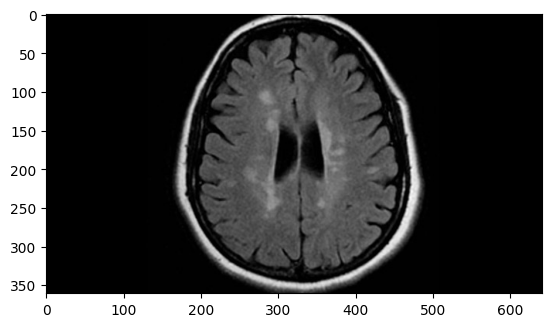

In [12]:
img = mpimg.imread("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 8.jpg")
plt.imshow(img)

In [13]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
img.shape

(361, 642, 3)

In [16]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (664, 550, 4)


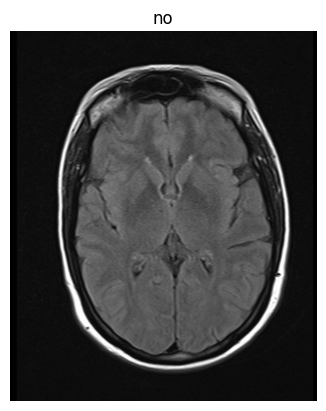

In [17]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="no")

Image shape: (338, 264, 3)


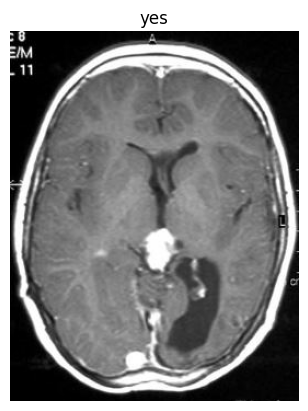

In [18]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="yes")

In [20]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [21]:
train_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [22]:
test_data

In [34]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [35]:
model_history = model.fit(train_data, 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 59s 7s/step - loss: 0.7957 - accuracy: 0.6443 - val_loss: 0.5134 - val_accuracy: 0.7866
Epoch 2/50
8/8 [==============================] - 57s 7s/step - loss: 0.5852 - accuracy: 0.7194 - val_loss: 0.5264 - val_accuracy: 0.7787
Epoch 3/50
8/8 [==============================] - 56s 7s/step - loss: 0.5357 - accuracy: 0.7628 - val_loss: 0.5193 - val_accuracy: 0.7747
Epoch 4/50
8/8 [==============================] - 56s 7s/step - loss: 0.5020 - accuracy: 0.7747 - val_loss: 0.4909 - val_accuracy: 0.7787
Epoch 5/50
8/8 [==============================] - 56s 7s/step - loss: 0.4796 - accuracy: 0.7905 - val_loss: 0.4412 - val_accuracy: 0.8063
Epoch 6/50
8/8 [==============================] - 56s 7s/step - loss: 0.4326 - accuracy: 0.8142 - val_loss: 0.4135 - val_accuracy: 0.8221
Epoch 7/50
8/8 [==============================] - 56s 7s/step - loss: 0.4850 - accuracy: 0.7866 - val_loss: 0.4262 - val_accuracy: 0.8221
Epoch 8/50
8/8 [==================

In [36]:
model.evaluate(test_data)

8/8 [==============================] - 11s 1s/step - loss: 0.0610 - accuracy: 0.9802


[0.06095908582210541, 0.9802371263504028]

<AxesSubplot: >

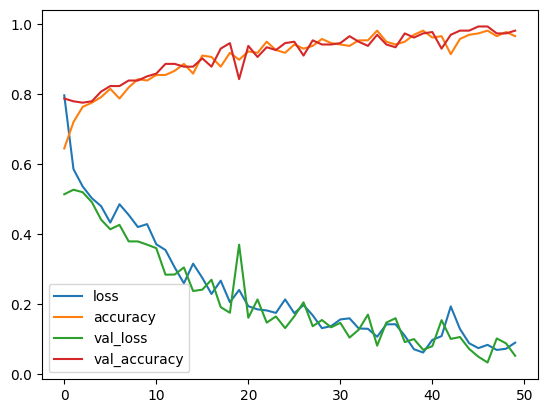

In [37]:
pd.DataFrame(model_history.history).plot()

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 32)      18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

making a prediction test

In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y10.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

1/1 [==============================] - 0s 65ms/step


array([[0.9996879]], dtype=float32)

In [45]:
if result[0]<=0.5:
    print("No BrainTumor")
else:
    print("BrainTumor")

BrainTumor


In [43]:
#save model
from tensorflow.keras.models import load_model
model.save('brain_tumor.h5')

In [46]:
import shutil
import os

# Save your model as a file or object
model = model.save('brain_tumor.h5')

# Set the destination path where you want to save the model file
destination_path = '/kaggle/working/model_file.h5'

# Save the model to the destination path
model.save(destination_path)

# Set the path of the Kaggle API token JSON file
kaggle_api_token_path = '/kaggle/working/kaggle.json'

# Set the target directory where you want to download the model file on your local machine
target_directory = './'

# Move the model file to the target directory
shutil.move(destination_path, target_directory)

# Rename the model file
new_model_file_path = os.path.join(target_directory, 'my_model_file.h5')
os.rename(os.path.join(target_directory, 'model_file.h5'), new_model_file_path)

# Print the path of the downloaded model file
print(f"Downloaded model file path: {new_model_file_path}")


AttributeError: 'NoneType' object has no attribute 'save'